In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("../Data/student_attendance_performance.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   attendance_percent     500 non-null    int64  
 1   hours_studied_per_day  500 non-null    int64  
 2   assignments_submitted  500 non-null    int64  
 3   internal_test_score    500 non-null    int64  
 4   final_exam_score       500 non-null    float64
dtypes: float64(1), int64(4)
memory usage: 19.7 KB


In [4]:
df.isnull().sum()

attendance_percent       0
hours_studied_per_day    0
assignments_submitted    0
internal_test_score      0
final_exam_score         0
dtype: int64

In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
df.describe()

,attendance_percent,hours_studied_per_day,assignments_submitted,internal_test_score,final_exam_score
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,80.436000,4.034000,4.932000,66.246000,81.034973
std,11.656142,2.011202,2.615542,15.356208,13.987404
min,60.000000,1.000000,1.000000,40.000000,47.535216
25%,71.000000,2.000000,3.000000,53.000000,70.558382
50%,82.000000,4.000000,5.000000,67.000000,82.492698
75%,91.000000,6.000000,7.000000,79.000000,91.303061
max,99.000000,7.000000,9.000000,94.000000,114.805108


In [7]:
import seaborn as sns

In [8]:
import matplotlib.pyplot as plt

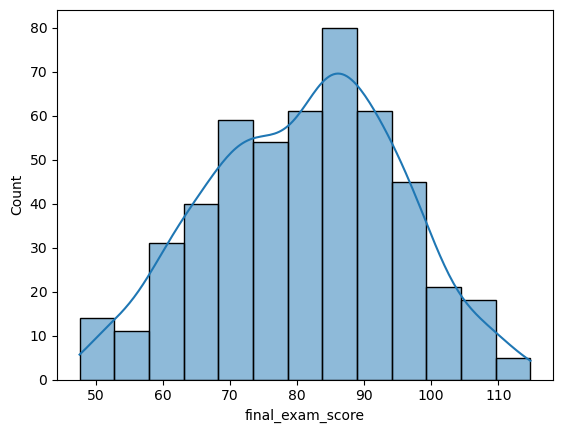

In [9]:
sns.histplot(df['final_exam_score'], kde=True)
plt.show()

In [10]:
# Relationship Analysis

<Axes: xlabel='attendance_percent', ylabel='final_exam_score'>

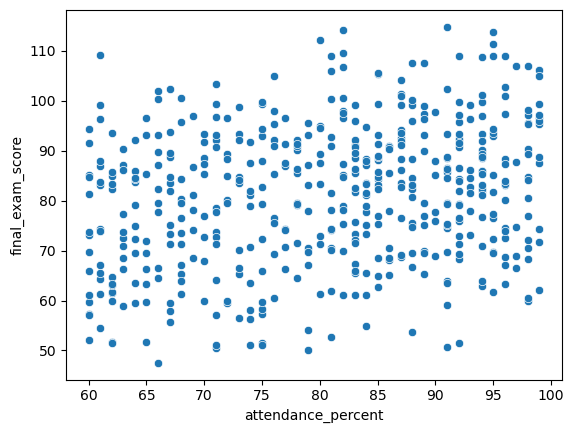

In [11]:
# Attendance vs Final Score
sns.scatterplot(x='attendance_percent', y='final_exam_score', data=df)


<Axes: xlabel='hours_studied_per_day', ylabel='final_exam_score'>

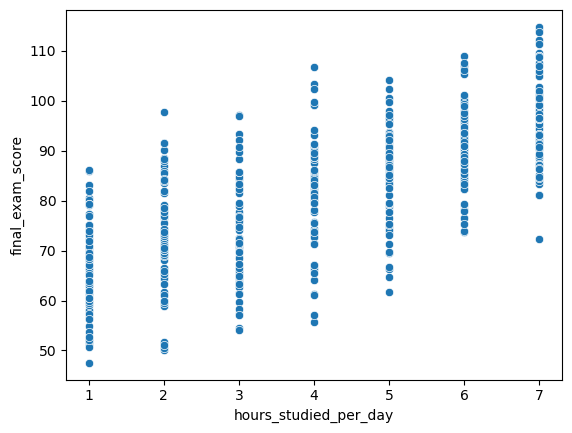

In [12]:
# Study Hours vs Final Score
sns.scatterplot(x='hours_studied_per_day', y='final_exam_score', data=df)


<Axes: xlabel='internal_test_score', ylabel='final_exam_score'>

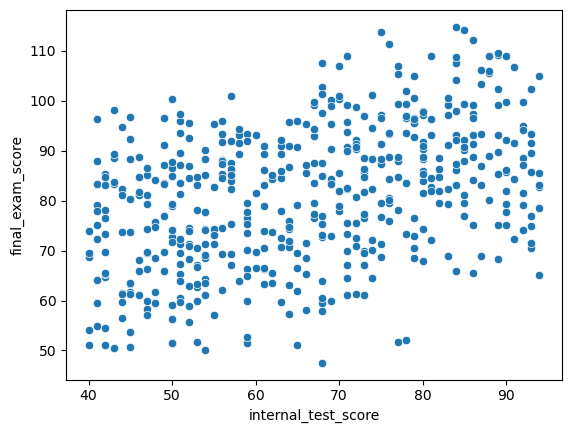

In [13]:
# Internal Score vs Final Score
sns.scatterplot(x='internal_test_score', y='final_exam_score', data=df)


In [14]:
# Correlation Analysis

In [15]:
df.corr()


,attendance_percent,hours_studied_per_day,assignments_submitted,internal_test_score,final_exam_score
attendance_percent,1.000000,0.065275,-0.047471,0.033346,0.244151
hours_studied_per_day,0.065275,1.000000,0.059109,-0.044395,0.710702
assignments_submitted,-0.047471,0.059109,1.000000,0.047019,0.410491
internal_test_score,0.033346,-0.044395,0.047019,1.000000,0.421561
final_exam_score,0.244151,0.710702,0.410491,0.421561,1.000000


In [16]:
# Feature-wise Performance Buckets

In [17]:
df['attendance_category']=pd.cut(
    df['attendance_percent'],
    bins=[0,70,85,100],
    labels=['Low','Medium','High']
)

In [18]:
df.groupby('attendance_category')['final_exam_score'].mean()

C:\Users\Admin\AppData\Local\Temp\ipykernel_19140\1347942782.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('attendance_category')['final_exam_score'].mean()


attendance_category
Low       76.405020
Medium    80.765071
High      84.320846
Name: final_exam_score, dtype: float64

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [20]:
# Define Features (X) and Target (y)

In [21]:
X = df[['attendance_percent',
        'hours_studied_per_day',
        'assignments_submitted',
        'internal_test_score']]

y = df['final_exam_score']

In [22]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [23]:
# Create model
model = LinearRegression()

# Train model
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

In [24]:
# Evaluation Metrics
print("R2 Score:", r2_score(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

R2 Score: 0.8370852429551436
Mean Absolute Error: 4.560201817094966
Mean Squared Error: 32.06070305028928


In [25]:
#Visualization

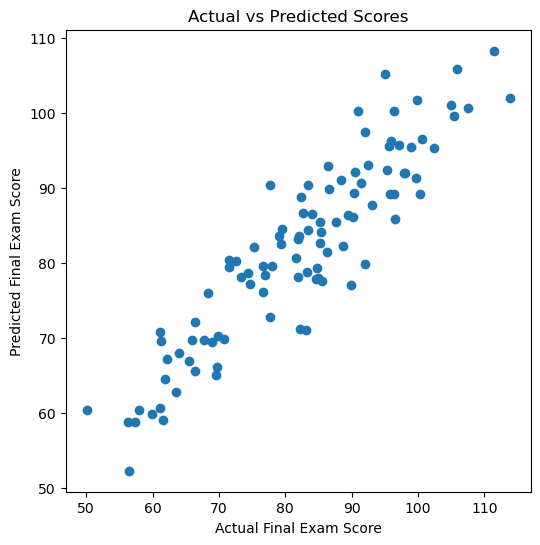

In [26]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Final Exam Score")
plt.ylabel("Predicted Final Exam Score")
plt.title("Actual vs Predicted Scores")
plt.show()

In [27]:
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})

coefficients


,Feature,Coefficient
0,attendance_percent,0.238758
1,hours_studied_per_day,4.731418
2,assignments_submitted,1.955800
3,internal_test_score,0.396173


## Model Interpretation

The Linear Regression model achieved an R² score of 0.82.

This means that 82% of the variation in students' final exam scores is explained by the selected features:
- attendance percentage
- hours studied per day
- assignments submitted
- internal test score

## Coefficient Interpretation

- A higher coefficient value indicates a stronger influence on final exam score.
- Positive coefficients suggest that increasing the feature increases exam score.
- Negative coefficients (if present) suggest an inverse relationship.


## Conclusion

- Internal test score has the highest impact on final exam performance.
- Attendance and study hours positively influence exam results.
- The model achieved an R² score of 0.82, indicating strong predictive capability.

